In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans 
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
import os
import random
import string
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from scipy.stats import multivariate_normal as mvn


In [24]:
df = pd.read_csv('E:\Twitter\\tweets.csv', encoding='utf-16', error_bad_lines=False)

b'Skipping line 3: expected 1 fields, saw 2\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 2\nSkipping line 34: expected 1 fields, saw 2\nSkipping line 57: expected 1 fields, saw 2\n'


In [25]:
def nospecial(text):
    import re
    text = re.sub("\W", " ",text)
    text = re.sub("[a-zA-Z0-9]","",text)
    return text

In [26]:
t="فاسٹ فوڈ صحت کے لیے کتنے خطرناک؟ ماہرین نے بتادیا - https://t.co/WHL575qus5 https://t.co/SUDOJyuxVsآٹھ ایرانی لیجنیئرز پرکشش منتقلی کے منتظر ہیں"

In [27]:
l1 = []
for i in range(57):
    val = df[df.columns[0]][i]
    l1.append(val)

In [28]:
l2 =[]
for tweet in l1:
    l2.append(nospecial(tweet))

In [29]:
df1 = pd.DataFrame(l2)
df1 = df1.rename({0: 'Tweets'}, axis=1)
df1.head()

,Tweets
0,ملک_کی_بقا_نوازشریف
1,__ حکومت کے تین سال میں معیشت ...
2,گئی سلیم مانڈوی والا
3,
4,_ حکومتی وزرا ہمیں بتا رہے ہیں اور ...


In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.fileids())
stpwd = stopwords.words("english")
print(stpwd)
#stop_words = set(stopwords.words("urdu"))
#print(stop_words)

#URDU STOPWORDS NOT AVAILABLE IN NLTK.CORPUS

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'do

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mhsin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import stanza
stanza.download('ur')
nlp = stanza.Pipeline('ur')
nlp = stanza.Pipeline(lang='ur', processors='tokenize',tokenize_no_ssplit=True)

2022-01-22 11:29:04 INFO: Downloading default packages for language: ur (Urdu)...
2022-01-22 11:29:04 INFO: File exists: C:\Users\mhsin\stanza_resources\ur\default.zip.
2022-01-22 11:29:05 INFO: Finished downloading models and saved to C:\Users\mhsin\stanza_resources.
2022-01-22 11:29:05 INFO: Loading these models for language: ur (Urdu):
| Processor | Package |
-----------------------
| tokenize  | udtb    |
| pos       | udtb    |
| lemma     | udtb    |
| depparse  | udtb    |

2022-01-22 11:29:05 INFO: Use device: cpu
2022-01-22 11:29:05 INFO: Loading: tokenize
2022-01-22 11:29:05 INFO: Loading: pos
2022-01-22 11:29:06 INFO: Loading: lemma
2022-01-22 11:29:06 INFO: Loading: depparse
2022-01-22 11:29:06 INFO: Done loading processors!
2022-01-22 11:29:06 INFO: Loading these models for language: ur (Urdu):
| Processor | Package |
-----------------------
| tokenize  | udtb    |

2022-01-22 11:29:06 INFO: Use device: cpu
2022-01-22 11:29:06 INFO: Loading: tokenize
2022-01-22 11:29:06 IN

In [32]:
#Stopwords


اب
ابھی
اپنا
اپنے
اپنی
اٹھا
اس
اسے
اسی
اگر
ان
انہوں
انہی
انہیں
انھیں
او
اور
اے
ایسا
ایسے
ایسی
ایک
آ
آپ
آتا
آتے
آتی
آگے
آنا
آنے
آنی
آئے
آئی
آئیں
آیا
با
بڑا
بڑے
بڑی
بعد
بعض
بلکہ
بہت
بھی
بے
پاس
پر
پہلے
پھر
تا
تاکہ
تب
تجھ
تجھے
تک
تم
تمام
تمہارا
تمہارے
تمھارے
تمہاری
تمہیں
تمھیں
تھا
تھے
تھی
تھیں
تو
تیری
تیرے
جا
جاتا
جاتی
جاتے
جاتی
جانے
جانی
جاؤ
جائے
جائیں
جب
جس
جن
جنہوں
جنہیں
جو
جیسا
جیسے
جیسی
جیسوں
چاہیئے
چلا
چاہے
چونکہ
حالاں
حالانکہ
دو
دونوں
دوں
دے
دی
دیا
دیں
دیے
دیتا
دیتے
دیتی
دینا
دینے
دینی
دیئے
ڈالا
ڈالنا
ڈالنے
ڈالنی
ڈالے
ڈالی
ذرا
رکھا
رکھتا
رکھتے
رکھتی
رکھنا
رکھنے
رکھنی
رکھے
رکھی
رہ
رہا
رہتا
رہتے
رہتی
رہنا
رہنے
رہنی
رہو
رہے
رہی
رہیں
زیادہ
سا
سامنے
سب
سکتا
سو
سے
سی
شاید
صرف
طرح
طرف
عین
کا
کبھی
کچھ
کہہ
کر
کرتا
کرتے
کرتی
کرنا
کرنے
کرو
کروں
کرے
کریں
کس
کسے
کسی
کہ
کہا
کہے
کو
کون
کوئی
کے
کی
کیا
کیسے
کیوں
کیونکہ
کیے
کئے
گا
گویا
گے
گی
گیا
گئے
گئی
لا
لاتا
لاتے
لاتی
لانا
لانے
لانی
لایا
لائے
لائی
لگا
لگے
لگی
لگیں
لو
لے
لی
لیا
لیتا
لیتے
لیتی
لیکن
لیں
لیے
لئے
مجھ
مجھے
مگر
میرا
میرے
میری
میں
نا
نہ
نہایت
نہیں
نے
ہاں
ہر
ہم
ہمارا
ہمارے
ہماری
ہو
ہوا
ہوتا
ہوتے
ہوتی
ہوتیں
ہوں
ہونا
ہونگے
ہونے
ہونی
ہوئے
ہوئی
ہوئیں
ہے
ہی
ہیں
و
والا
والوں
والے
والی
وہ
وہاں
وہی
وہیں
یا
یعنی
یہ
یہاں
یہی
یہیں

In [33]:
words1 = "ایت نہیں نے ہاں ہر ہم ہمارا ہمارے ہماری ہو ہوا ہوتا ہوتے ہوتی ہوتیں ہوں ہونا ہونگے ہونے ہونی ہوئے ہوئی ہوئیں ہے ہی ہیں و والا والوں والے والی وہ وہاں وہی وہیں یا یعنی یہ یہاں یہی یہیںاب ابھی اپنا اپنے اپنی اٹھا اس اسے اسی اگر ان انہوں انہی انہیں انھیں او اور اے ایسا ایسے ایسی ایک آ آپ آتا آتے آتی آگے آنا آنے آنی آئے آئی آئیں آیا با بڑا بڑے بڑی بعد بعض بلکہ بہت بھی بے پاس پر پہلے پھر تا تاکہ تب تجھ تجھے تک تم تمام تمہارا تمہارے تمھارے تمہاری تمہیں تمھیں تھا تھے تھی تھیں تو تیری تیرے جا جاتا جاتی جاتے جاتی جانے جانی جاؤ جائے جائیں جب جس جن جنہوں جنہیں جو جیسا جیسے جیسی جیسوں چاہیئے چلا چاہے چونکہ حالاں حالانکہ دو دونوں دوں دے دی دیا دیں دیے دیتا دیتے دیتی دینا دینے دینی دیئے ڈالا ڈالنا ڈالنے ڈالنی ڈالے ڈالی ذرا رکھا رکھتا رکھتے رکھتی رکھنا رکھنے رکھنی رکھے رکھی رہ رہا رہتا رہتے رہتی رہنا رہنے رہنی رہو رہے رہی رہیں زیادہ سا سامنے سب سکتا سو سے سی شاید صرف طرح طرف عین کا کبھی کچھ کہہ کر کرتا کرتے کرتی کرنا کرنے کرو کروں کرے کریں کس کسے کسی کہ کہا کہے کو کون کوئی کے کی کیا کیسے کیوں کیونکہ کیے کئے گا گویا گے گی گیا گئے گئی لا لاتا لاتے لاتی لانا لانے لانی لایا لائے لائی لگا لگے لگی لگیں لو لے لی لیا لیتا لیتے لیتی لیکن لیں لیے لئے مجھ مجھے مگر میرا میرے میری میں نا نہ نہایت نہیں نے ہاں ہر ہم ہمارا ہمارے ہماری ہو ہوا ہوتا ہوتے ہوتی ہوتیں ہوں ہونا ہونگے ہونے ہونی ہوئے ہوئی ہوئیں ہے ہی ہیں و والا والوں والے والی وہ وہاں وہی وہیں یا یعنی یہ یہاں یہی یہیں"
words2=" اور اوًچب اوًچبئی اوًچی اوًچے اى اً اًذر اًہیں اٹھبًب اپٌب اپٌے اچھب اچھی اچھے اکثر اکٹھب اکٹھی اکٹھے اکیلا اکیلی اکیلے اگرچہ اہن ایطے ایک ب ت تبزٍ تت تر ترتیت تریي تعذاد تن تو توبم توہی توہیں تٌہب تک تھب تھوڑا تھوڑی تھوڑے تھی تھے تیي ثب ثبئیں ثبترتیت ثبری ثبرے ثبعث ثبلا ثبلترتیت ثبہر ثدبئے ثرآں ثراں ثرش ثعذ ثغیر ثلٌذ ثلٌذوثبلا ثلکہ ثي ثٌب ثٌبرہب ثٌبرہی ثٌبرہے ثٌبًب ثٌذ ثٌذکرو ثٌذکرًب ثٌذی ثڑا ثڑوں ثڑی ثڑے ثھر ثھرا ثھراہوا ثھرپور ثھی ثہت ثہتر ثہتری ثہتریي ثیچ ج خب خبرہب خبرہی خبرہے خبهوظ خبًب خبًتب خبًتی خبًتے خبًٌب خت ختن خجکہ خص خططرذ خلذی خو خواى خوًہی خوکہ خٌبة خگہ خگہوں خگہیں خیطب خیطبکہ در درخبت درخہ درخے درزقیقت درضت دش دفعہ دلچطپ دلچطپی دلچطپیبں دو دور دوراى دوضرا دوضروں دوضری دوضرے دوًوں دکھبئیں دکھبتب دکھبتی دکھبتے دکھبو دکھبًب دکھبیب دی دیب دیتب دیتی دیتے دیر دیٌب دیکھو دیکھٌب دیکھی دیکھیں دے ر راضتوں راضتہ راضتے رریعہ رریعے رکي رکھ رکھب رکھتب رکھتبہوں رکھتی رکھتے رکھی رکھے رہب رہی رہے ز زبصل زبضر زبل زبلات زبلیہ زصوں زصہ زصے زقبئق زقیتیں زقیقت زکن زکویہ زیبدٍ صبف صسیر صفر صورت صورتسبل صورتوں صورتیں ض ضبت ضبتھ ضبدٍ ضبرا ضبرے ضبل ضبلوں ضت ضرور ضرورت ضروری ضلطلہ ضوچ ضوچب ضوچتب ضوچتی ضوچتے ضوچو ضوچٌب ضوچی ضوچیں ضکب ضکتب ضکتی ضکتے ضکٌب ضکی ضکے ضیذھب ضیذھی ضیذھے ضیکٌڈ ضے طرف طریق طریقوں طریقہ طریقے طور طورپر ظبہر ع عذد عظین علاقوں علاقہ علاقے علاوٍ عووهی غبیذ غخص غذ غروع غروعبت غے فرد فی ق قجل قجیلہ قطن لئے لا لازهی لو لوجب لوجی لوجے لوسبت لوسہ لوگ لوگوں لڑکپي لگتب لگتی لگتے لگٌب لگی لگیں لگے لی لیب لیٌب لیں لے ه هتعلق هختلف هسترم هسترهہ هسطوش هسیذ هطئلہ هطئلے هطبئل هطتعول هطلق هعلوم هػتول هلا هوکي هوکٌبت هوکٌہ هٌبضت هڑا هڑًب هڑے هکول هگر هہرثبى هیرا هیری هیرے هیں و وار والے وٍ ًئی ًئے ًب ًبپطٌذ ًبگسیر ًطجت ًقطہ ًو ًوخواى ًکبلٌب ًکتہ ًہ ًہیں ًیب ًے ٓ آش ٹھیک پبئے پبش پبًب پبًچ پر پراًب پطٌذ پل پورا پوچھب پوچھتب پوچھتی پوچھتے پوچھو پوچھوں پوچھٌب پوچھیں پچھلا پھر پہلا پہلی پہلےضی پہلےضے پہلےضےہی پیع چبر چبہب چبہٌب چبہے چلا چلو چلیں چلے چکب چکی چکیں چکے چھوٹب چھوٹوں چھوٹی چھوٹے چھہ چیسیں ڈھوًڈا ڈھوًڈلیب ڈھوًڈو ڈھوًڈًب ڈھوًڈی ڈھوًڈیں ک کئی کئے کب کبفی کبم کت کجھی کرا کرتب کرتبہوں کرتی کرتے کرتےہو کررہب کررہی کررہے کرو کرًب کریں کرے کطی کل کن کوئی کوتر کورا کوروں کورٍ کورے کوطي کوى کوًطب کوًطی کوًطے کھولا کھولو کھولٌب کھولی کھولیں کھولے کہ کہب کہتب کہتی کہتے کہو کہوں کہٌب کہی کہیں کہے کی کیب کیطب کیطرف کیطے کیلئے کیوًکہ کیوں کیے کے کےثعذ کےرریعے گئی گئے گب گرد گروٍ گروپ گروہوں گٌتی گی گیب گے ہر ہن ہو ہوئی ہوئے ہوا ہوبرا ہوبری ہوبرے ہوتب ہوتی ہوتے ہورہب ہورہی ہورہے ہوضکتب ہوضکتی ہوضکتے ہوًب ہوًی ہوًے ہوچکب ہوچکی ہوچکے ہوگئی ہوگئے ہوگیب ہوں ہی ہیں ہے ی یقیٌی یہ یہبں"
urdu_words = words1+" "+ words2
def split_on_space(text):
    import re
    text = re.sub("\s", "\''",text)
    return text

urdu_stopwords = split_on_space(urdu_words)

In [34]:
print(urdu_stopwords)

ایت''نہیں''نے''ہاں''ہر''ہم''ہمارا''ہمارے''ہماری''ہو''ہوا''ہوتا''ہوتے''ہوتی''ہوتیں''ہوں''ہونا''ہونگے''ہونے''ہونی''ہوئے''ہوئی''ہوئیں''ہے''ہی''ہیں''و''والا''والوں''والے''والی''وہ''وہاں''وہی''وہیں''یا''یعنی''یہ''یہاں''یہی''یہیںاب''ابھی''اپنا''اپنے''اپنی''اٹھا''اس''اسے''اسی''اگر''ان''انہوں''انہی''انہیں''انھیں''او''اور''اے''ایسا''ایسے''ایسی''ایک''آ''آپ''آتا''آتے''آتی''آگے''آنا''آنے''آنی''آئے''آئی''آئیں''آیا''با''بڑا''بڑے''بڑی''بعد''بعض''بلکہ''بہت''بھی''بے''پاس''پر''پہلے''پھر''تا''تاکہ''تب''تجھ''تجھے''تک''تم''تمام''تمہارا''تمہارے''تمھارے''تمہاری''تمہیں''تمھیں''تھا''تھے''تھی''تھیں''تو''تیری''تیرے''جا''جاتا''جاتی''جاتے''جاتی''جانے''جانی''جاؤ''جائے''جائیں''جب''جس''جن''جنہوں''جنہیں''جو''جیسا''جیسے''جیسی''جیسوں''چاہیئے''چلا''چاہے''چونکہ''حالاں''حالانکہ''دو''دونوں''دوں''دے''دی''دیا''دیں''دیے''دیتا''دیتے''دیتی''دینا''دینے''دینی''دیئے''ڈالا''ڈالنا''ڈالنے''ڈالنی''ڈالے''ڈالی''ذرا''رکھا''رکھتا''رکھتے''رکھتی''رکھنا''رکھنے''رکھنی''رکھے''رکھی''رہ''رہا''رہتا''رہتے''رہتی''رہنا''رہنے''رہنی''رہو''رہے''رہی''رہی

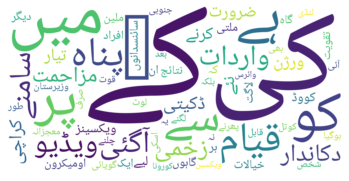

In [35]:
from wordcloud import WordCloud
from bidi.algorithm import get_display
from arabic_reshaper import ArabicReshaper

configuration = {
    "language": "Urdu"
}
reshaper = ArabicReshaper(configuration=configuration)

tweets_text = reshaper.reshape(df1[df1.columns[0]].all())
tweets_text = get_display(tweets_text)


wc = WordCloud(background_color="white",width=1600, stopwords=urdu_stopwords,height=800,font_path='NotoNaskhArabic-Regular.ttf', repeat=False)
wc.generate(tweets_text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")


2022-01-22 11:03:55 INFO: Downloading default packages for language: ur (Urdu)...


2022-01-22 11:03:56 INFO: File exists: C:\Users\mhsin\stanza_resources\ur\default.zip.
2022-01-22 11:03:57 INFO: Finished downloading models and saved to C:\Users\mhsin\stanza_resources.
2022-01-22 11:03:57 INFO: Loading these models for language: ur (Urdu):
| Processor | Package |
-----------------------
| tokenize  | udtb    |
| pos       | udtb    |
| lemma     | udtb    |
| depparse  | udtb    |

2022-01-22 11:03:57 INFO: Use device: cpu
2022-01-22 11:03:57 INFO: Loading: tokenize
2022-01-22 11:03:57 INFO: Loading: pos
2022-01-22 11:03:57 INFO: Loading: lemma
2022-01-22 11:03:57 INFO: Loading: depparse
2022-01-22 11:03:58 INFO: Done loading processors!
2022-01-22 11:03:58 INFO: Loading these models for language: ur (Urdu):
| Processor | Package |
-----------------------
| tokenize  | udtb    |

2022-01-22 11:03:58 INFO: Use device: cpu
2022-01-22 11:03:58 INFO: Loading: tokenize
2022-01-22 11:03:58 INFO: Done loading processors!


In [38]:
df1['Tweets'][5]

'           بحیرہ احمر میں ایرانی آرمی فلیٹ  مشن کی تکمیل'

In [22]:
from sklearn.cluster import KMeans  
data = df1
tf_idf_vectorizor = TfidfVectorizer(max_features = 5000)
tf_idf = tf_idf_vectorizor.fit_transform(df1['Tweets'][:])
tf_idf_norm = normalize(tf_idf)

tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()


,__,آئی,آباد,آتی,آج,آخری,آرمی,آرڈیننس,آرگنائزیشن,آزاد,...,ہےیہ,یا,یار,یاست,یرغمال,یعنی,یقینا,یورپ,یہ,یہیں
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.406127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
len(tf_idf_array)

57

In [205]:
tf_idf_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40612704, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.06524447,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10327576, 0.        , ..., 0.        , 0.08379225,
        0.        ]])

In [206]:
#Kmeans
class Kmeans:
    
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    def convergence_calculation(self):
        
        pass
    
    def predict(self, data):
        
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running
Wall time: 225 ms


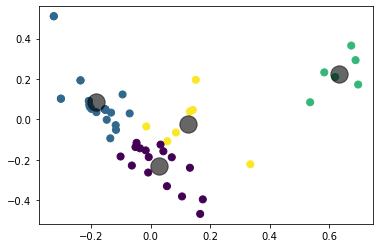

In [208]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(4, 1, 600)
%time fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);